# Loan Prediction Project

## Project Overview
This project aims to predict whether a loan application will be **approved** or **rejected** based on applicant data like income, credit history, and employment status.

It is a **binary classification problem**, where the output is one of two categories.

In [4]:
# importing the depedencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Loading the dataset and some basic EDA

data = pd.read_csv('loan.csv')
print(data.head())
print('-'*100)
print(data.info())
print('-'*100)
print(data.describe())
print('-'*100)
print(data.isnull().sum()) # Missing values found here
print('-'*100)
print(data.shape)
print('-'*100)
print(data.columns)
print('-'*100)
print(data.duplicated().sum())
print('-'*100)
print(data['Loan_Status'].value_counts())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
data = data.dropna()  # Dropping the missing values
print(data.isnull().sum())  # Missing values found here

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


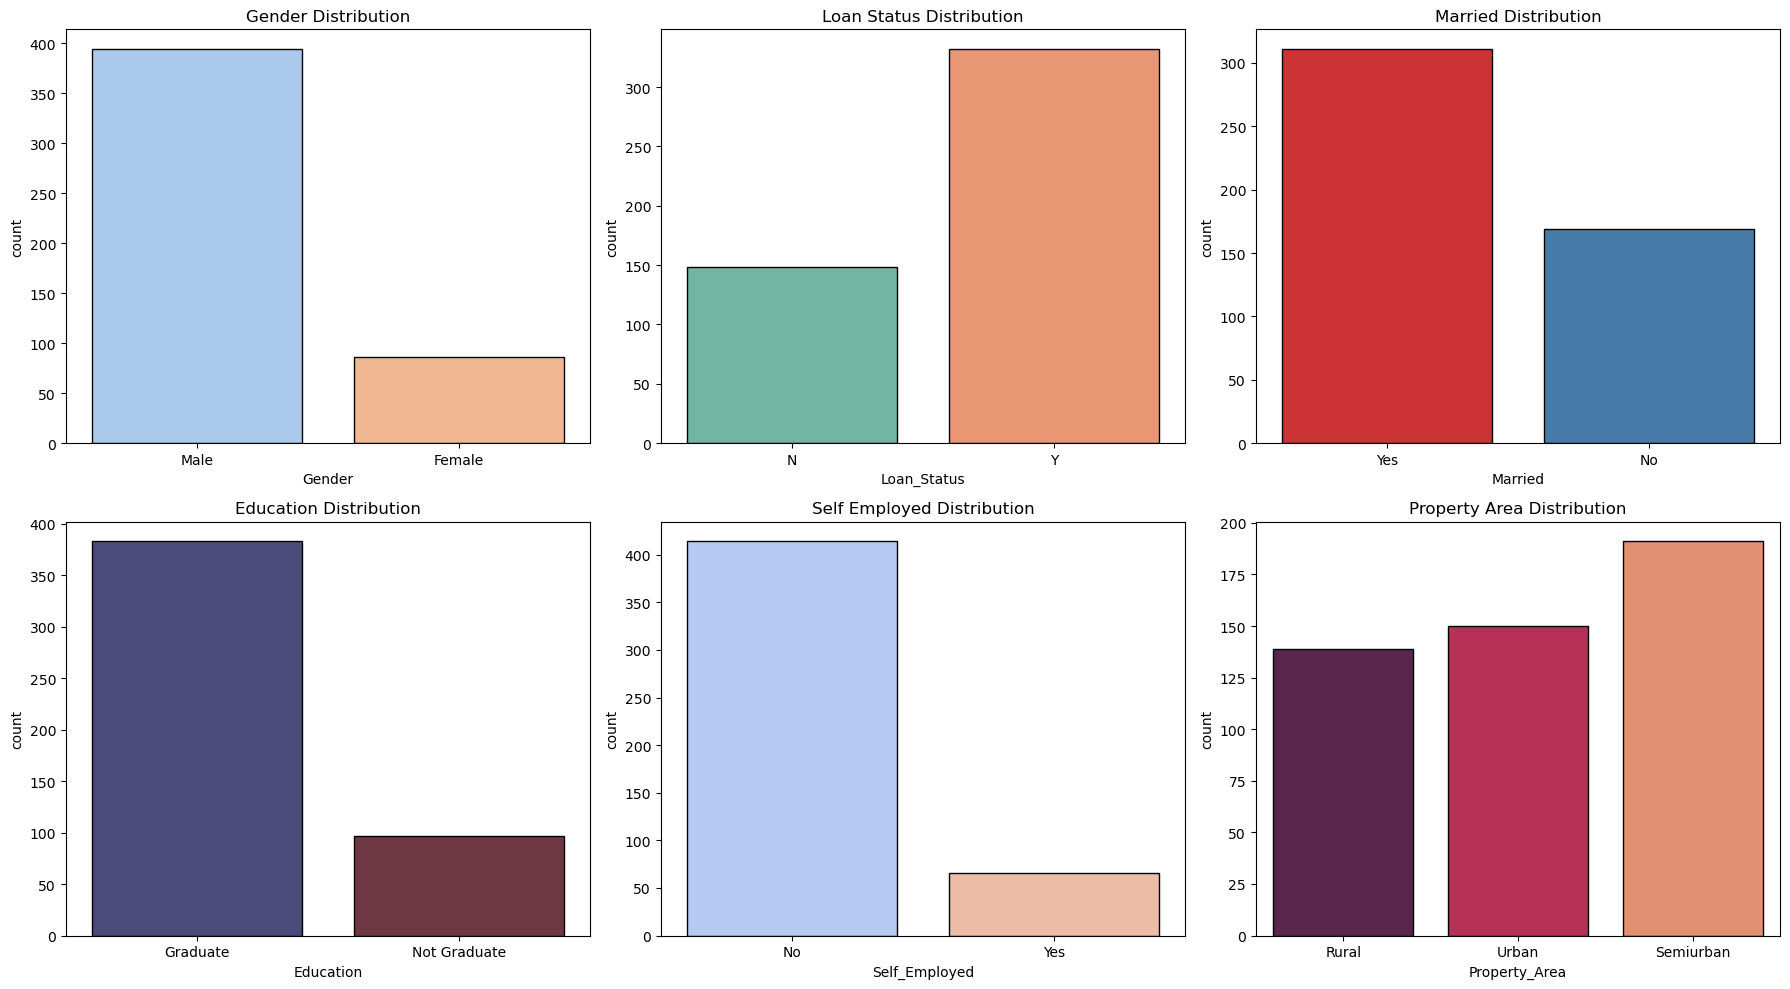

In [7]:
# Creating Count Plots for Categorical Data

# Creating a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1 – Gender
sns.countplot(
    x="Gender",
    hue="Gender",
    data=data,
    palette="pastel",
    edgecolor="black",
    legend=False,
    ax=axes[0, 0],
)
axes[0, 0].set_title("Gender Distribution")

# Plot 2 – Loan Status
sns.countplot(
    x="Loan_Status",
    hue="Loan_Status",
    data=data,
    palette="Set2",
    edgecolor="black",
    legend=False,
    ax=axes[0, 1],
)
axes[0, 1].set_title("Loan Status Distribution")

# Plot 3 – Married
sns.countplot(
    x="Married",
    hue="Married",
    data=data,
    palette="Set1",
    edgecolor="black",
    legend=False,
    ax=axes[0, 2],
)
axes[0, 2].set_title("Married Distribution")

# Plot 4 – Education
sns.countplot(
    x="Education",
    hue="Education",
    data=data,
    palette="icefire",
    edgecolor="black",
    legend=False,
    ax=axes[1, 0],
)
axes[1, 0].set_title("Education Distribution")

# Plot 5 – Self Employed
sns.countplot(
    x="Self_Employed",
    hue="Self_Employed",
    data=data,
    palette="coolwarm",
    edgecolor="black",
    legend=False,
    ax=axes[1, 1],
)
axes[1, 1].set_title("Self Employed Distribution")

# Plot 6 – Property Area
sns.countplot(
    x="Property_Area",
    hue="Property_Area",
    data=data,
    palette="rocket",
    edgecolor="black",
    legend=False,
    ax=axes[1, 2],
)
axes[1, 2].set_title("Property Area Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# Label Encoding the categorical columns

data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0

In [9]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
# Replacing the value of 3+ to 4:

data = data.replace(to_replace = '3+', value = 4)
data["Dependents"].value_counts()


Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

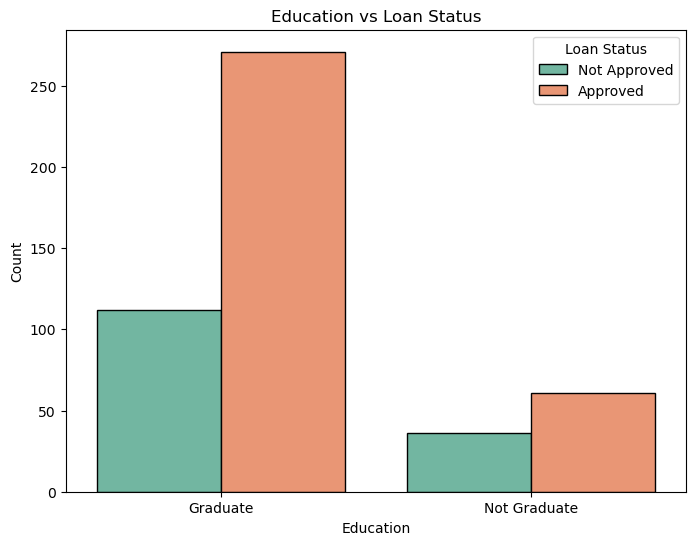

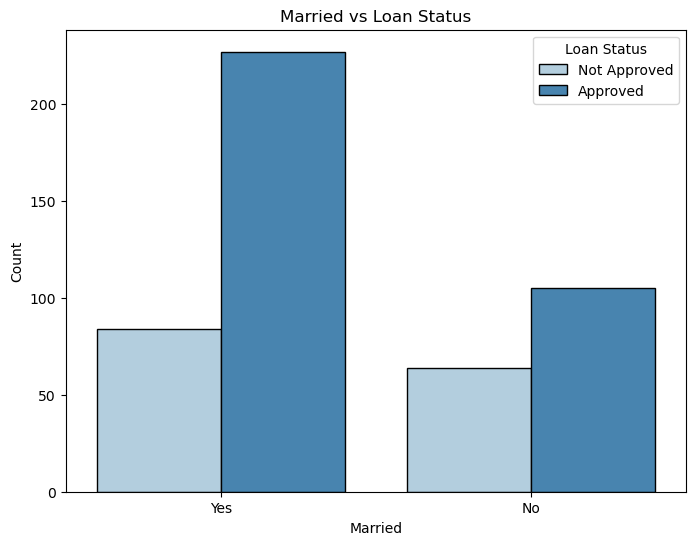

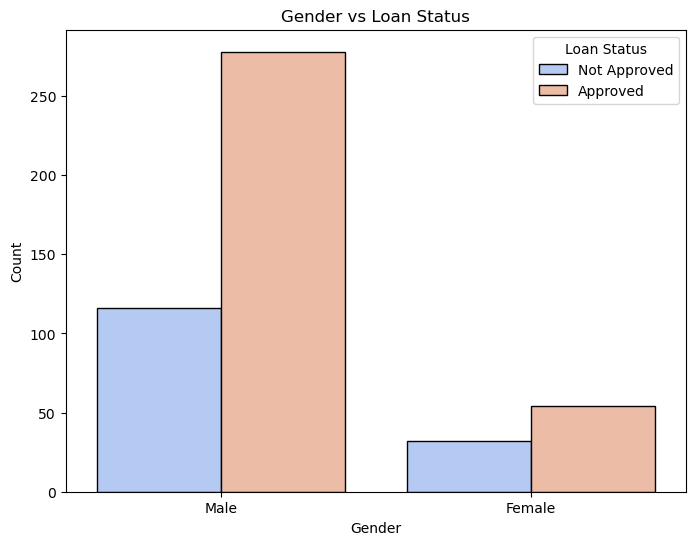

In [11]:
# Data Visualizations for comparisons:

# Education and Loan Status:

plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=data, palette='Set2', edgecolor='black')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show() # Graduates have higher chances of getting loan

#  Married and Loan Status:

plt.figure(figsize=(8, 6))
sns.countplot(
    x="Married", hue="Loan_Status", data=data, palette="Blues", edgecolor="black"
)
plt.title("Married vs Loan Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show() # Higher chances of getting loan if married

# Gender and Loan Status:

plt.figure(figsize=(8, 6))
sns.countplot(
    x="Gender", hue="Loan_Status", data=data, palette="coolwarm", edgecolor="black"
)
plt.title("Gender vs Loan Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show() # Males have higher chances of getting loan

In [12]:
# Converting the categorical columns to numerical values:

data.replace({"Gender": {"Male": 1, "Female": 0}}, inplace=True)
data.replace({"Married": {"No": 0, "Yes": 1}}, inplace=True)
data.replace({"Education": {"Not Graduate": 0, "Graduate": 1}}, inplace=True)
data.replace({"Self_Employed": {"No": 0, "Yes": 1}}, inplace=True)
data.replace({"Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2}}, inplace=True)

print(data.head())

    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             

In [13]:
# Separating the features and target

X = data.drop(columns =['Loan_ID','Loan_Status'], axis=1)
Y = data['Loan_Status']
print(X)
print('-'*100)
print(Y)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Train Test Split, and model training plus evaluation

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=2, stratify=Y
)
print(X.shape, X_train.shape, X_test.shape)

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=2),
    "SVC": SVC(kernel="linear", class_weight="balanced", random_state=2),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=2),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=2),
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    report = classification_report(Y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": round(accuracy_score(Y_test, y_pred) * 100, 2),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1 Score": round(report["weighted avg"]["f1-score"], 4),
    }
    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"Accuracy: {results[name]['Accuracy']}%")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
    print("Classification Report:\n", classification_report(Y_test, y_pred))

# Summary table
results_df = pd.DataFrame(results).T.sort_values("Accuracy", ascending=False)
print("\n", results_df)

(480, 11) (432, 11) (48, 11)

Model: Logistic Regression
Accuracy: 85.42%
Confusion Matrix:
 [[11  4]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.88      0.91      0.90        33

    accuracy                           0.85        48
   macro avg       0.83      0.82      0.83        48
weighted avg       0.85      0.85      0.85        48


Model: SVC
Accuracy: 81.25%
Confusion Matrix:
 [[ 9  6]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.83      0.91      0.87        33

    accuracy                           0.81        48
   macro avg       0.79      0.75      0.77        48
weighted avg       0.81      0.81      0.81        48


Model: Decision Tree
Accuracy: 77.08%
Confusion Matrix:
 [[ 7  8]
 [ 3 30]]
Classification Report:
               prec

## Saving LR model (best performing)

In [17]:
lr_model = LogisticRegression(class_weight="balanced", random_state=2)
lr_model.fit(X_train, Y_train)

joblib.dump(lr_model, "loan_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")
print("Model saved successfully")

Model saved successfully
